In [59]:
"""
3-DOF Leg Workspace
Kai De La Cruz 6/27/2025
Converted from MATLAB to Python
"""

import numpy as np
import matplotlib.pyplot as plt

# --------------------------
# DH Transform Function
# --------------------------
def transform(theta, d, a, alpha):
    """
    Generate a 4x4 homogeneous transform matrix using DH parameters
    Angles in radians
    """
    return np.array([
        [np.cos(theta), -np.sin(theta)*np.cos(alpha),  np.sin(theta)*np.sin(alpha), a*np.cos(theta)],
        [np.sin(theta),  np.cos(theta)*np.cos(alpha), -np.cos(theta)*np.sin(alpha), a*np.sin(theta)],
        [0,              np.sin(alpha),                np.cos(alpha),               d],
        [0,              0,                            0,                           1]
    ])


In [60]:
# ==========================
# 3-DOF Workspace
# ==========================
L1 = 2.285   # [in]
L2 = 4.77  
L3 = 5.75  
L4 = 6.125 

theta1_range = np.deg2rad(np.arange(-90, 90, 25))
theta2_range = np.deg2rad(np.arange(0, 361, 25))
theta3_range = np.deg2rad(np.arange(0, 136, 25))

all_points = []

for th1 in theta1_range:
    for th2 in theta2_range:
        for th3 in theta3_range:

            A0 = transform(+np.pi/2, 0, 0, +np.pi/2)
            A1 = transform(th1 - np.pi/2, L1, 0, -np.pi/2)
            A2 = transform(th2 - np.pi/2, L2, L3, 0)
            A3 = transform(th3, 0, L4, 0)

            T = A0 @ A1 @ A2 @ A3

            all_points.append(T[0:3, 3])

all_points = np.array(all_points)


# ==========================
# 2-DOF Workspace
# ==========================
L3_2d = 5.372 
L4_2d = 6.125 

theta2_range2 = np.deg2rad(np.arange(0, 361, 10))
theta3_range2 = np.deg2rad(np.arange(0, 136, 10))

all_points2 = []

for th2 in theta2_range2:
    for th3 in theta3_range2:

        A0 = transform(+np.pi/2, 0, 0, +np.pi/2)
        A1 = transform(-np.pi/2, 0, 0, -np.pi/2)
        A2 = transform(th2 - np.pi/2, 0, L3_2d, 0)
        A3 = transform(th3, 0, L4_2d, 0)

        T = A0 @ A1 @ A2 @ A3

        all_points2.append(T[0:3, 3])

all_points2 = np.array(all_points2)


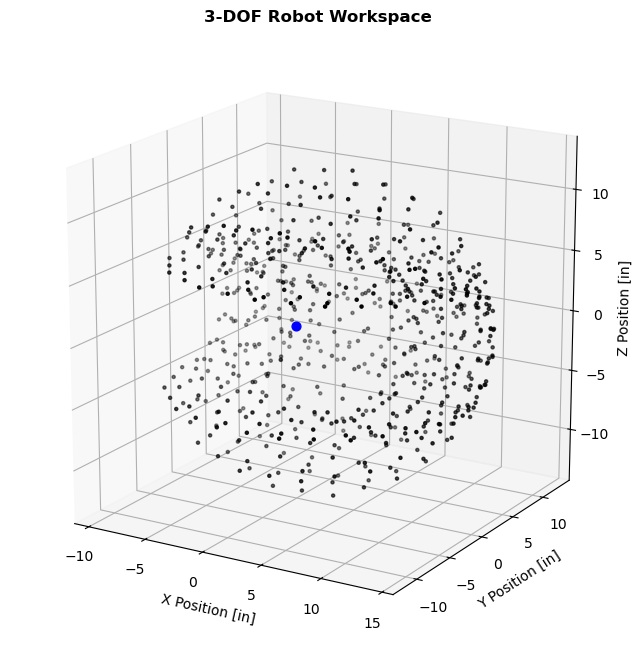

In [61]:
# ==========================
# Plot 3-DOF Workspace
# ==========================
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(projection='3d')

ax.scatter(all_points[:,0], all_points[:,1], all_points[:,2],
           c='k', s=5, label='3-DOF Workspace')

ax.scatter(0, 0, 0, c='b', s=40, marker='o')

ax.set_xlabel('X Position [in]')
ax.set_ylabel('Y Position [in]')
ax.set_zlabel('Z Position [in]')
ax.set_title('3-DOF Robot Workspace',fontsize=12, fontweight='semibold')

ax.set_box_aspect([1,1,1])
ax.view_init(elev=17.5, azim=-59.08)
ax.grid(True)

plt.show()



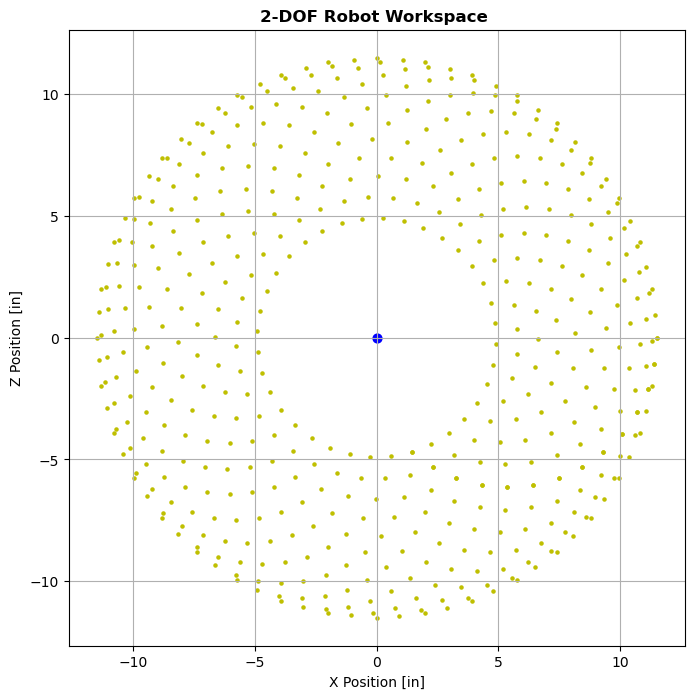

In [62]:
# ==========================
# Plot 2-DOF Workspace (Z–X Plane)
# ==========================
fig, ax = plt.subplots(figsize=(8, 8))

# X vs Z
ax.scatter(all_points2[:,0], all_points2[:,2],
           c='y', s=5, label='2-DOF Workspace')

# Origin
ax.scatter(0, 0, c='b', s=40, marker='o')

ax.set_xlabel('X Position [in]')
ax.set_ylabel('Z Position [in]')
ax.set_title('2-DOF Robot Workspace ',fontsize=12, fontweight='bold')

ax.set_aspect('equal', adjustable='box')
ax.grid(True)


plt.show()


In [63]:
def compute_reach(points_xyz):
    r = np.linalg.norm(points_xyz, axis=1)   # sqrt(x^2+y^2+z^2)
    return r.max()

def compute_reach_xz(points_xyz):
    xz = points_xyz[:, [0, 2]]
    r = np.linalg.norm(xz, axis=1)
    return r.max()

def convex_hull_volume(points_xyz):
    from scipy.spatial import ConvexHull
    hull = ConvexHull(points_xyz)
    return hull.volume

from scipy.spatial import ConvexHull

def workspace_area_xz(points_xyz):
    xz = points_xyz[:, [0, 2]]   # drop Y
    hull = ConvexHull(xz)
    return hull.area


In [64]:
area_3dof = workspace_area_xz(all_points)
area_2dof = workspace_area_xz(all_points2)

print("\n=== WORKSPACE AREA (XZ PLANE) ===")
print(f"3-DOF workspace area: {area_3dof:.4f}")
print(f"2-DOF workspace area: {area_2dof:.4f}")

print("\n=== AREA RATIO ===")
print(f"3-DOF / 2-DOF area ratio: {area_3dof / area_2dof:.3f}")



=== WORKSPACE AREA (XZ PLANE) ===
3-DOF workspace area: 79.0447
2-DOF workspace area: 72.1461

=== AREA RATIO ===
3-DOF / 2-DOF area ratio: 1.096
